# Examine sampling 3 datapoints from proteins with high and low variances 

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns

import cptac
import cptac.algorithms as al


en = cptac.Endometrial()

### Use Endometrial proteomic abundance data

In [2]:
proteomics_data = en.get_proteomics()
proteomics_data = proteomics_data[:95]
proteins = list(proteomics_data.columns)

### Compute the Standard deviation of each protein

In [3]:
sd_dict = {}
for protein in proteins:
    sd = np.std(proteomics_data[protein])
    sd_dict[protein] = sd

### Sort proteins High to Low Standard deviation, cast in DataFrame

In [4]:
sorted_sd_dict = sorted(sd_dict.items(), key=lambda x: x[1], reverse=True)

sd_df = pd.DataFrame.from_dict(sorted_sd_dict)
sd_df = sd_df.rename(columns={0:'Protein',1:'SD'})
display(sd_df)

,Protein,SD
0,POU3F2,3.087475
1,ITLN2,2.870300
2,SPINK6,2.745150
3,GAGE2A,2.536669
4,DKK4,2.461074
5,S100A1,2.295821
6,DEFA3,2.283358
7,TEX261,2.167200
8,XAGE2,2.148260
9,DDX43,2.141091


### Select the 1000 proteins with highest and lowest standard deviations

In [5]:
high_sd_proteins = list(sd_df[:1000]['Protein'])
low_sd_proteins = list(sd_df[len(sd_df) - 1000 : len(sd_df)]['Protein'])

In [6]:
#high_sd_proteins

In [7]:
#low_sd_proteins

### Define method to randomly select three values from a list

In [8]:
import random
def randomly_select_3(list_of_values):
    length = len(list_of_values)
    random.shuffle(list_of_values)
    selected = list_of_values[0:3]
    return selected

### Randomly select 3 samples from a  high variance protein

In [9]:
high_sd_protein = 'APMAP'
#high_sd_protein = 'POU3F2'
high_proteomics = list(proteomics_data[high_sd_protein].dropna())
high_proteomics
three_high_measurements = randomly_select_3(high_proteomics)
three_high_measurements

[0.0726, 0.522, 0.38299999999999995]

### Randomly select 3 samples from a  low variance protein

In [10]:
low_sd_protein = 'WDR26'
#low_sd_protein = 'RAB33A'
low_proteomics = list(proteomics_data[low_sd_protein].dropna())
low_proteomics
three_low_measurements = randomly_select_3(low_proteomics)
three_low_measurements

[0.184, -0.16399999999999998, 0.201]

### Plot the entire distribution

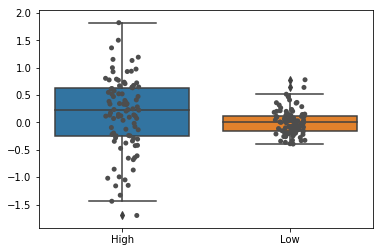

In [11]:
dist_df = pd.DataFrame(columns=['High','Low'])
dist_df['High'] = high_proteomics
dist_df['Low'] = pd.Series(low_proteomics)

plot_dist = sns.boxplot(data = dist_df)
pts_dist = sns.stripplot(data=dist_df, jitter=True, color='.3')

### Plot the 3 randomly sampled values

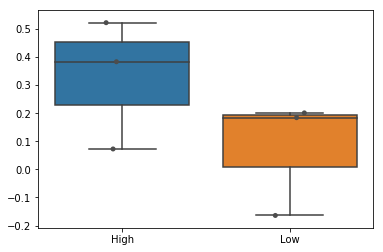

In [12]:
plot_df = pd.DataFrame(columns = ['High', 'Low'])
plot_df['High'] = three_high_measurements
plot_df['Low'] = three_low_measurements

plot = sns.boxplot(data=plot_df)
pts = sns.stripplot(data=plot_df, jitter=True, color='.3')

In [13]:
sd_high = np.std(three_high_measurements)
sd_low = np.std(three_low_measurements)

print("HIGH SD: ", sd_high)
print("LOW SD: ", sd_low)

HIGH SD:  0.18786210072520984
LOW SD:  0.16819895626575357


### Track SD for 3 randomly selected for high/low proteins over 1000 highest and lowest variance proteins

In [14]:
high_sds = []
for high_prot in high_sd_proteins:
    high_proteomics = list(proteomics_data[high_prot].dropna())
    three_high_measurements = randomly_select_3(high_proteomics)
    high_sd = np.std(three_high_measurements)
    if not np.isnan(high_sd):
        high_sds.append(high_sd)

low_sds = []
for low_prot in low_sd_proteins:
    low_proteomics = list(proteomics_data[low_prot].dropna())
    three_low_measurements = randomly_select_3(low_proteomics)
    low_sd = np.std(three_low_measurements)
    if not np.isnan(low_sd):
        low_sds.append(low_sd)

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Plot standard deviations of the 3 randomly selected values from each of the 1000 highest and lowest variance proteins

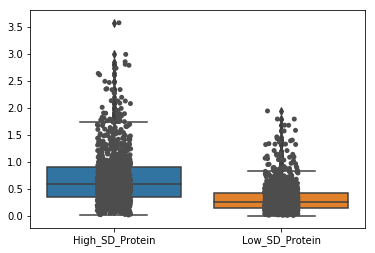

In [15]:
sd_plot_df = pd.DataFrame(columns=['High_SD_Protein', 'Low_SD_Protein'])
sd_plot_df['High_SD_Protein'] = pd.Series(high_sds)
sd_plot_df['Low_SD_Protein'] = pd.Series(low_sds)

plot = sns.boxplot(data=sd_plot_df)
pts = sns.stripplot(data=sd_plot_df, jitter=True, color='.3')

### Do a t-test to determine if the 3 samples was sufficient to capture the difference in variance between the 2 groups across the 1000 highest and lowest variance proteins

In [16]:
stat, pval = scipy.stats.ttest_ind(high_sds,low_sds)
print(pval)

1.5020371220293147e-86


### Compute medium variance proteins

In [17]:
medium_sd_proteins = list(sd_df[5000:6000]['Protein'])
#medium_sd_proteins

### Repeat process above, but this time use medium variance proteins and low variance proteins

In [18]:
low_sds = []
for low_prot in low_sd_proteins:
    low_proteomics = list(proteomics_data[low_prot].dropna())
    three_low_measurements = randomly_select_3(low_proteomics)
    low_sd = np.std(three_low_measurements)
    if not np.isnan(low_sd):
        low_sds.append(low_sd)
        
medium_sds = []
for med_prot in medium_sd_proteins:
    med_proteomics = list(proteomics_data[med_prot].dropna())
    three_med_measurements = randomly_select_3(med_proteomics)
    med_sd = np.std(three_med_measurements)
    if not np.isnan(med_sd):
        medium_sds.append(med_sd)

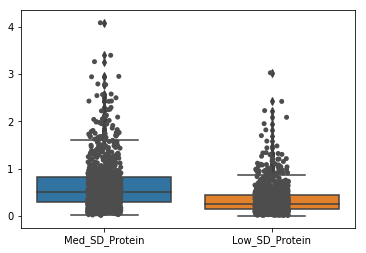

In [19]:
sd_plot_df = pd.DataFrame(columns=['Med_SD_Protein', 'Low_SD_Protein'])
sd_plot_df['Med_SD_Protein'] = pd.Series(medium_sds)
sd_plot_df['Low_SD_Protein'] = pd.Series(low_sds)

plot = sns.boxplot(data=sd_plot_df)
pts = sns.stripplot(data=sd_plot_df, jitter=True, color='.3')

In [20]:
stat, pval = scipy.stats.ttest_ind(medium_sds,low_sds)
print(pval)

1.9172500322864936e-54
